In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

In [397]:
# Get the CSV data here and print head
df_train = pd.read_csv('train.csv')
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [398]:
df_train.shape

(1168, 81)

In [399]:
# Get the CSV data here and print head
df_test = pd.read_csv('test.csv')
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [400]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [401]:
df_test.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [402]:
#remove cust id as it is not required
df_train.drop(["Id"], axis = 1, inplace = True)
df_test.drop(["Id"], axis = 1, inplace = True)

In [403]:
df_train["LotFrontage"].value_counts()

60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64

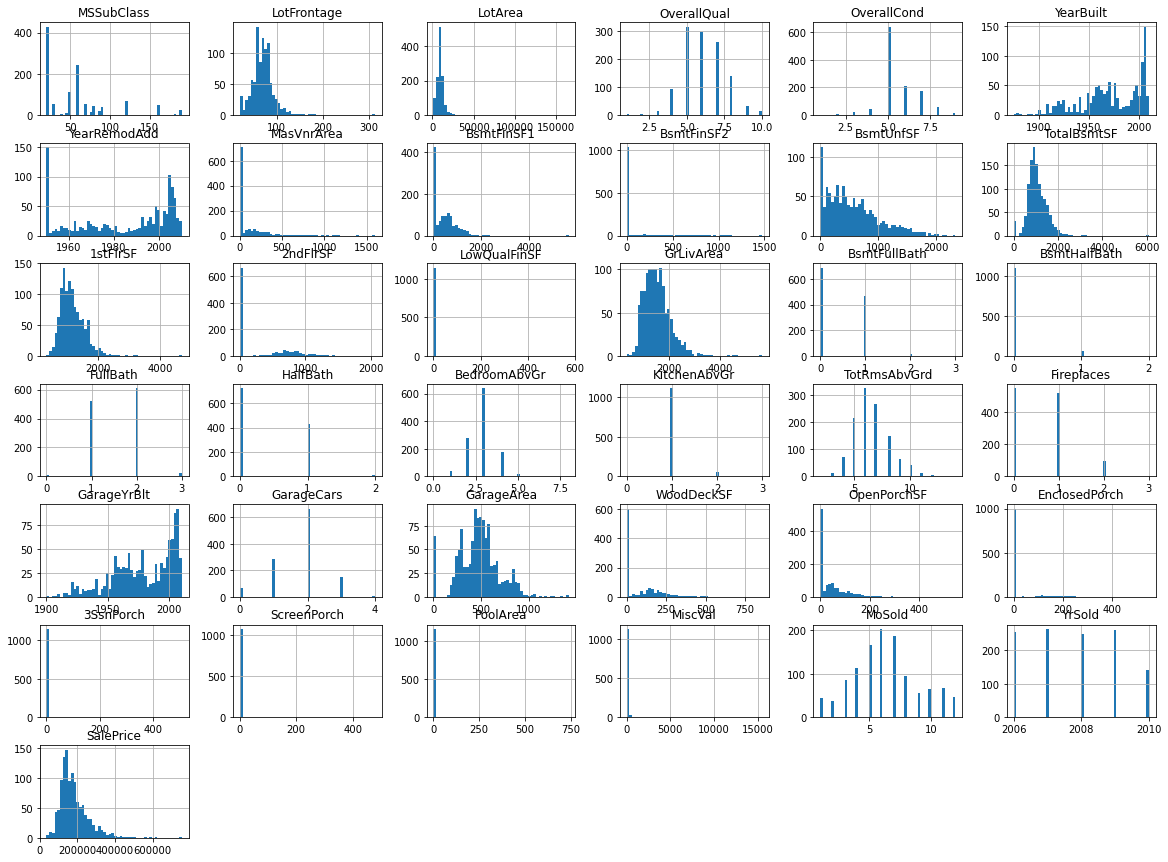

In [404]:
# Lets look at the distribution of all the numeric variables
%matplotlib inline
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20,15))
plt.show()

In [405]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          77 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [406]:
#finding unique values in object data types
def explore_object_type(df_train,feature_name):
    if df_train[feature_name].dtype == 'object':
        print(df_train[feature_name].value_counts())

In [408]:
for featureName in df_train:
    if df_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df_train, str(featureName))


"MSZoning's" Values with count are :
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

"Street's" Values with count are :
Pave    1164
Grvl       4
Name: Street, dtype: int64

"Alley's" Values with count are :
Grvl    41
Pave    36
Name: Alley, dtype: int64

"LotShape's" Values with count are :
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

"LandContour's" Values with count are :
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

"Utilities's" Values with count are :
AllPub    1168
Name: Utilities, dtype: int64

"LotConfig's" Values with count are :
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

"LandSlope's" Values with count are :
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

"Neighborhood's" Values with count are :
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilb

In [409]:
# Replacing 'C (all)' with 'C'

df_train["MSZoning"] = df_train["MSZoning"].replace("C (all)", "C")

In [410]:
#with test
df_test["MSZoning"] = df_train["MSZoning"].replace("C (all)", "C")

In [411]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0         120       RL          NaN     4928   Pave   NaN      IR1   
1          20       RL         95.0    15865   Pave   NaN      IR1   
2          60       RL         92.0     9920   Pave   NaN      IR1   
3          20       RL        105.0    11751   Pave   NaN      IR1   
4          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2         Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   
3         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2007        WD         Normal     128000  
1       0     10    2007        WD         Normal     268000  
2       0      6    2007        WD         Normal     269790  
3       0      1    2010       COD         Normal     190000  
4       0      6    2009        WD         Normal     215000  

[5 rows x 80 columns]

In [412]:
#drop the column utilities as all values are same

df_train.drop(["Utilities"], axis = 1, inplace = True)
df_test.drop(["Utilities"], axis = 1, inplace = True)

In [413]:
# Replacing the missing values with 'NA' for object type data

obj_NA = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for i in obj_NA:
    df_train[i].fillna("NA", inplace=True)

In [414]:
# Replacing the missing values with 'NA' for object type data

obj_NA = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for i in obj_NA:
    df_test[i].fillna("NA", inplace=True)

In [415]:
#using mode to fill these columns and replace nan as it has less prcentage of null values

df_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])


In [416]:
df_test['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])

In [331]:
#Handling the missing values for MasVnrArea & Electrical(as very less data is missing,we cna remove it)
drop_na = ["MasVnrArea", "Electrical"]

for i in drop_na:
    print (i, ":", round((df_train[i].isna().sum()/df_train.shape[0])*100, 2))

MasVnrArea : 0.6
Electrical : 0.0


In [417]:
#wth test data
#Handling the missing values for MasVnrArea & Electrical(as very less data is missing,we cna remove it)
drop_na = ["MasVnrArea", "Electrical"]

for i in drop_na:
    print (i, ":", round((df_test[i].isna().sum()/df_test.shape[0])*100, 2))

MasVnrArea : 0.34
Electrical : 0.34


In [332]:
df_train = df_train.dropna(subset=drop_na, axis=0)

In [418]:
#with test
df_test = df_test.dropna(subset=drop_na, axis=0)

In [419]:
df_train.Alley

0         NA
1         NA
2         NA
3         NA
4         NA
        ... 
1163      NA
1164      NA
1165      NA
1166    Pave
1167      NA
Name: Alley, Length: 1168, dtype: object

In [420]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0         120       RL          NaN     4928   Pave    NA      IR1   
1          20       RL         95.0    15865   Pave    NA      IR1   
2          60       RL         92.0     9920   Pave    NA      IR1   
3          20       RL        105.0    11751   Pave    NA      IR1   
4          20       RL          NaN    16635   Pave    NA      IR1   

  LandContour LotConfig LandSlope  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    Inside       Gtl  ...        0     NA     NA          NA   
1         Lvl    Inside       Mod  ...        0     NA     NA          NA   
2         Lvl   CulDSac       Gtl  ...        0     NA     NA          NA   
3         Lvl    Inside       Gtl  ...        0     NA  MnPrv          NA   
4         Lvl       FR2       Gtl  ...        0     NA     NA          NA   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    2007        WD         Normal    128000  
1       0      10    2007        WD         Normal    268000  
2       0       6    2007        WD         Normal    269790  
3       0       1    2010       COD         Normal    190000  
4       0       6    2009        WD         Normal    215000  

[5 rows x 79 columns]

In [421]:
#finding unique values in int64 data types
def explore_object_type(df_train,feature_name):
    if df_train[feature_name].dtype == 'int64':
        print(df_train[feature_name].value_counts())

In [422]:
for featureName in df_train:
    if df_train[featureName].dtype == 'int64':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df_train, str(featureName))



"MSSubClass's" Values with count are :
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

"LotArea's" Values with count are :
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
12803     1
9480      1
13478     1
12122     1
7861      1
Name: LotArea, Length: 892, dtype: int64

"OverallQual's" Values with count are :
5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64

"OverallCond's" Values with count are :
5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64

"YearBuilt's" Values with count are :
2006    57
2005    51
2007    41
2004    37
2003    33
        ..
1927     1
1911     1
2010     1
1892     1
1913     1
Name: YearBuilt, Length: 110, dtype: int64

"YearRemodAdd's" Values

In [423]:
#finding unique values in float data types
def explore_object_type(df_train,feature_name):
    if df_train[feature_name].dtype == 'float64':
        print(df_train[feature_name].value_counts())

In [424]:
for featureName in df_train:
    if df_train[featureName].dtype == 'float64':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df_train, str(featureName))


"LotFrontage's" Values with count are :
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64

"MasVnrArea's" Values with count are :
0.0      692
72.0       7
180.0      6
120.0      6
106.0      5
        ... 
653.0      1
975.0      1
226.0      1
204.0      1
31.0       1
Name: MasVnrArea, Length: 283, dtype: int64

"GarageYrBlt's" Values with count are :
2006.0    52
2005.0    51
2007.0    40
2003.0    37
2004.0    36
          ..
1900.0     1
1927.0     1
1908.0     1
1933.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64


In [425]:
#GarageYrBlt , LotFrontage have missing values
#adding mode to GarageYrBlt
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0])
#adding mean to LotFrontage,
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

In [426]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [427]:
#finding unique values in object data type
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df_train:
    if df_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df_train[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

Col_name  Value
7    Neighborhood     25
15    Exterior2nd     15
14    Exterior1st     14
40       SaleType      9
8      Condition1      9
11     HouseStyle      8
13       RoofMatl      8
9      Condition2      8
23   BsmtFinType1      7
30     Functional      7
24   BsmtFinType2      7
32     GarageType      7
12      RoofStyle      6
34     GarageQual      6
35     GarageCond      6
31    FireplaceQu      6
19     Foundation      6
25        Heating      6
41  SaleCondition      6
38          Fence      5
39    MiscFeature      5
28     Electrical      5
26      HeatingQC      5
0        MSZoning      5
22   BsmtExposure      5
18      ExterCond      5
5       LotConfig      5
10       BldgType      5
21       BsmtCond      5
20       BsmtQual      5
29    KitchenQual      4
17      ExterQual      4
16     MasVnrType      4
37         PoolQC      4
4     LandContour      4
3        LotShape      4
33   GarageFinish      4
6       LandSlope      3
36     PavedDrive      3
2           Alley      3
27     CentralAir      2
1          Street      2

<AxesSubplot:>

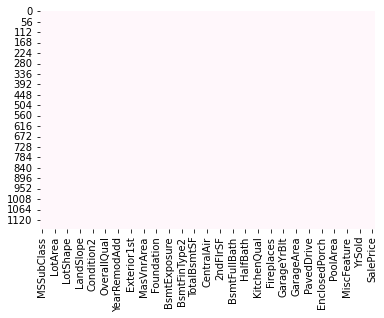

In [428]:
#checking for any missing data
# Missing Data Pattern 
import seaborn as sns
sns.heatmap(df_train.isnull(), cbar=False, cmap='PuBu')

In [429]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()
#as we can see, there are no missing values

Total   Percent
MasVnrArea       7  0.005993
MSSubClass       0  0.000000
Electrical       0  0.000000
GarageYrBlt      0  0.000000
GarageType       0  0.000000

In [344]:
#trying to see if there is a rel with the columns which have years

In [430]:
years = [f for f in df_train.columns if "Yr" in f or "Year" in f]
years

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

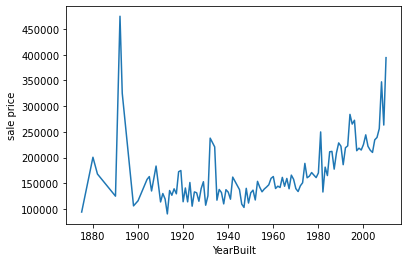

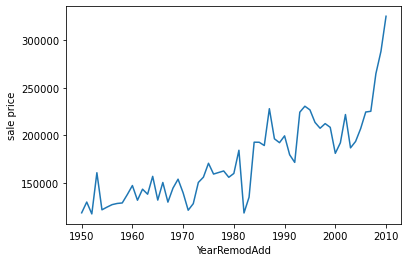

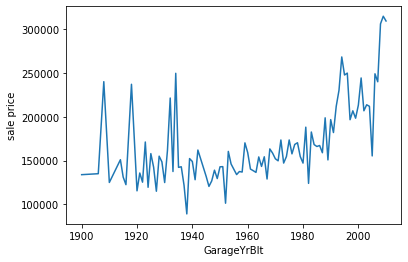

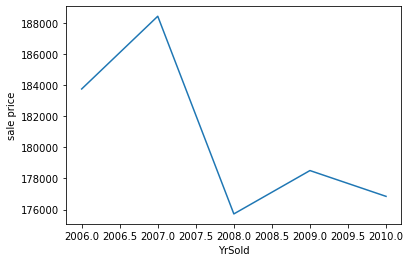

In [300]:
for i in years : 
    data = df_train.copy()
    data.groupby(i)['SalePrice'].mean().plot()
    plt.xlabel(i)
    plt.ylabel("sale price")
    plt.show()

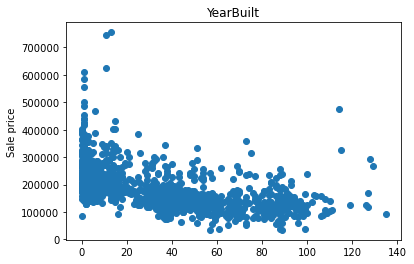

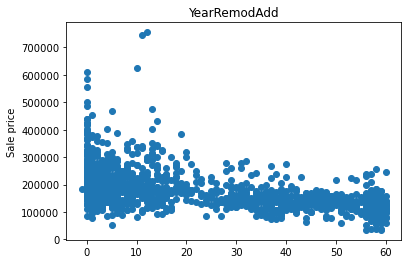

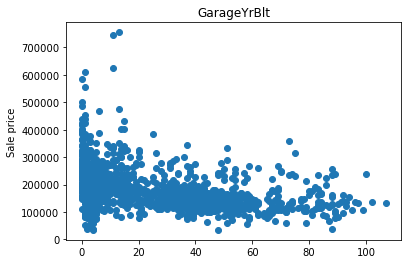

In [301]:
for i in years : 
    if i != "YrSold" :
        data = df_train.copy()
        data[i] = data['YrSold'] - data[i]
        plt.scatter(data[i],data["SalePrice"])
        plt.title(i)
        plt.ylabel("Sale price")
        plt.show()

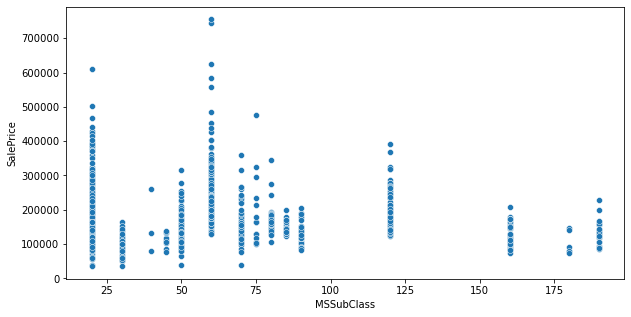

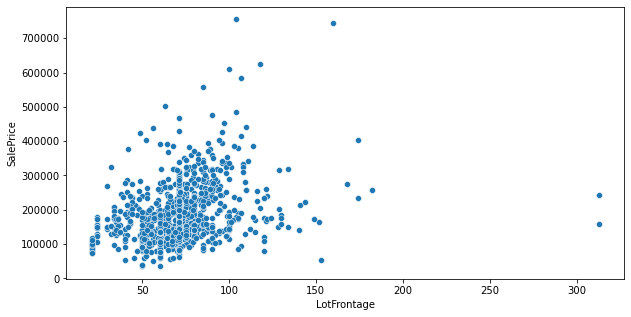

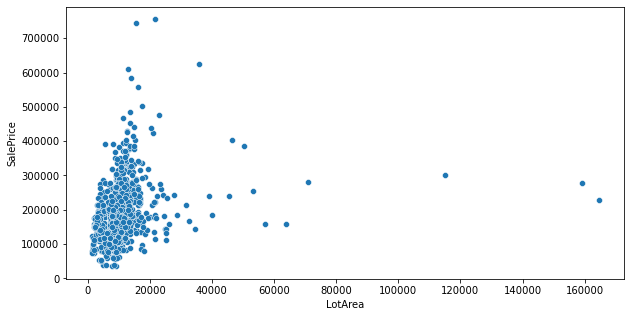

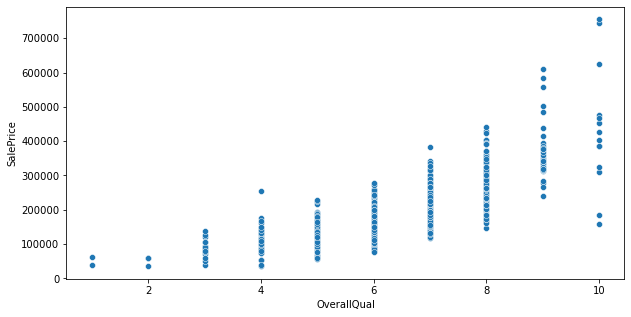

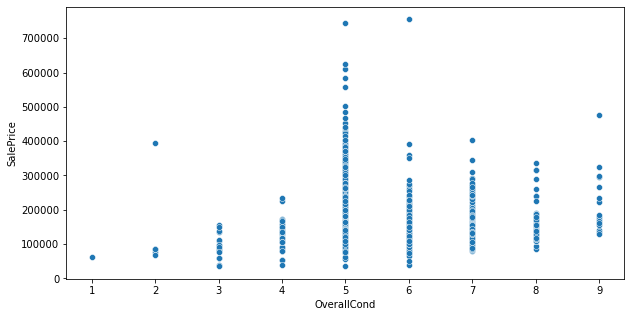

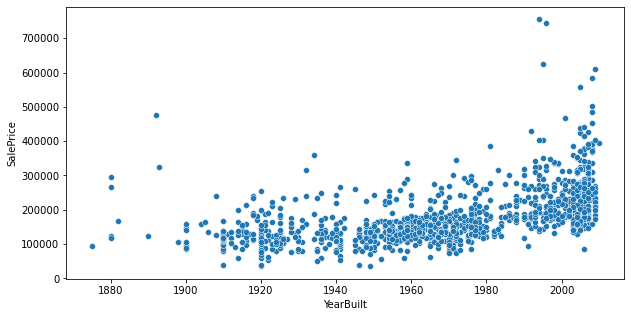

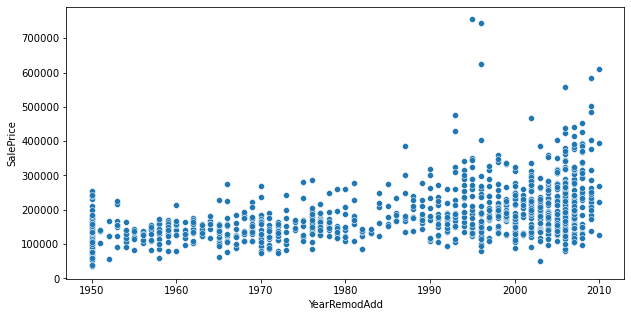

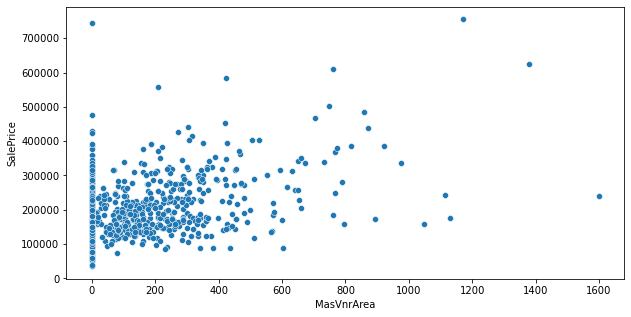

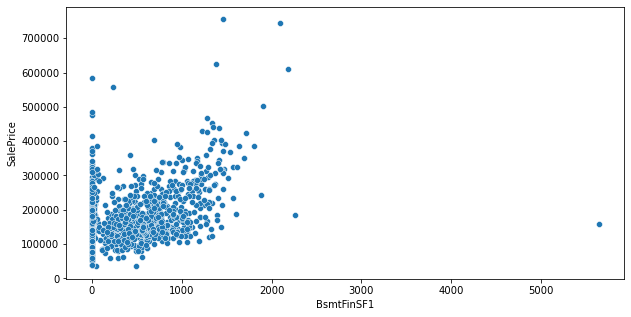

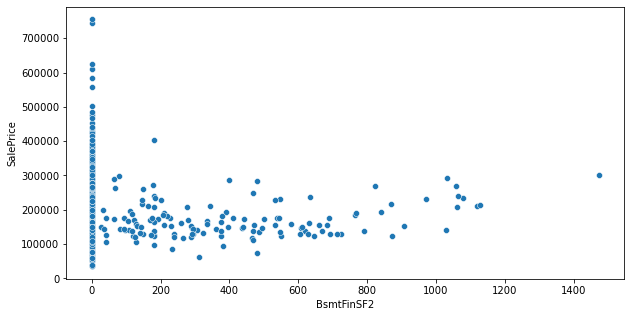

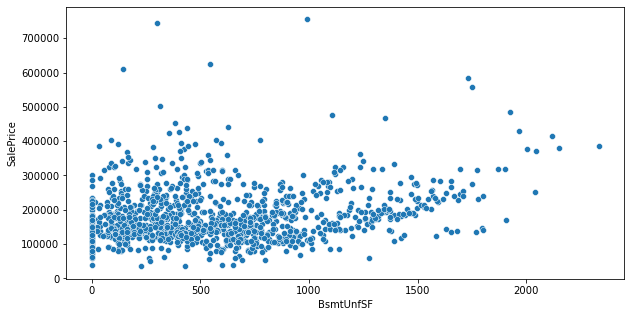

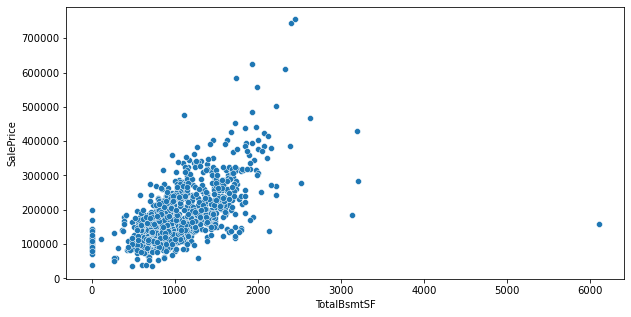

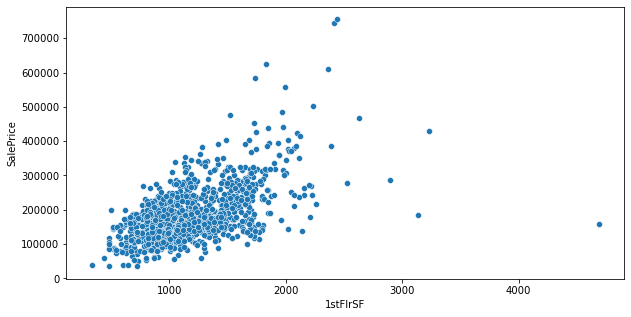

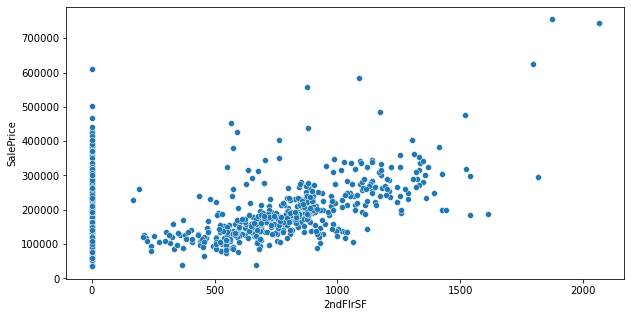

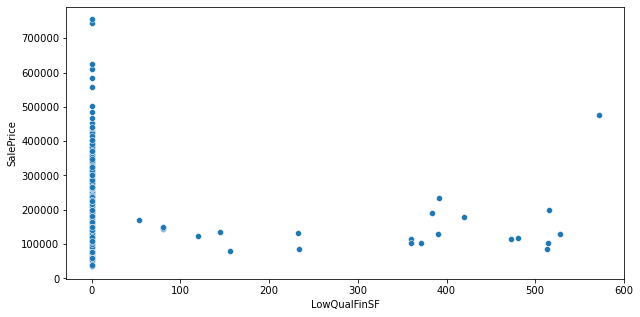

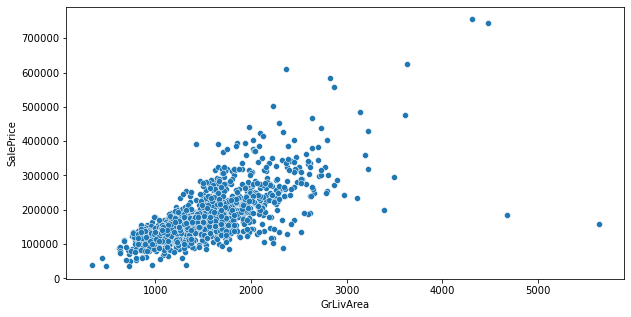

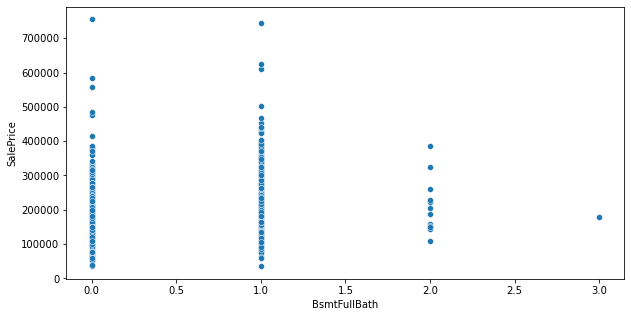

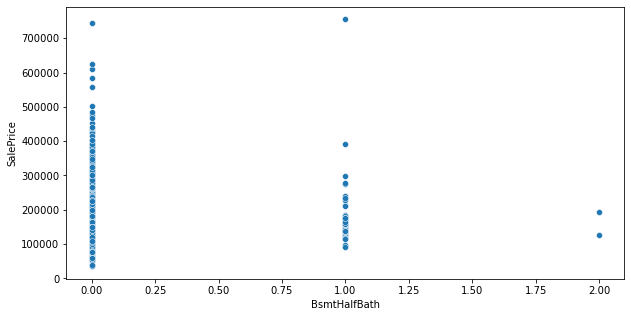

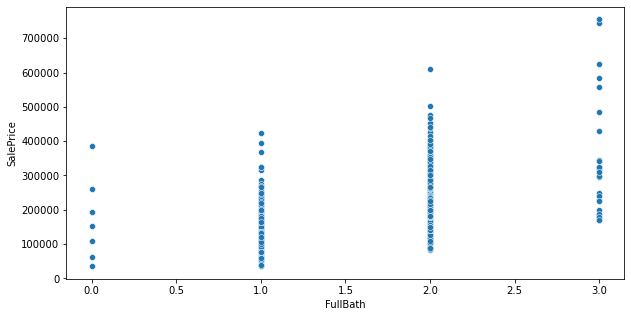

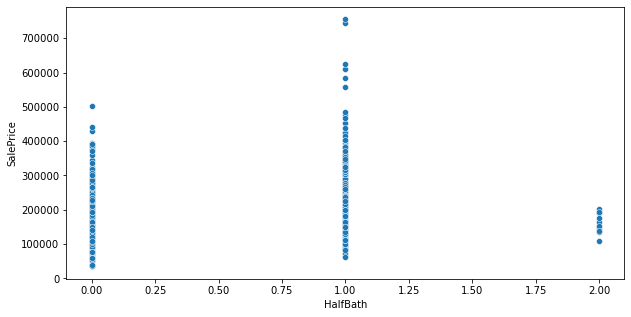

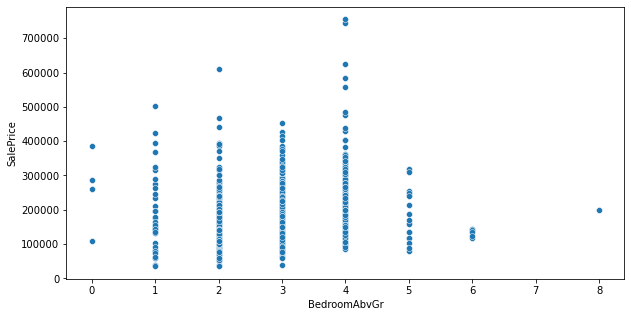

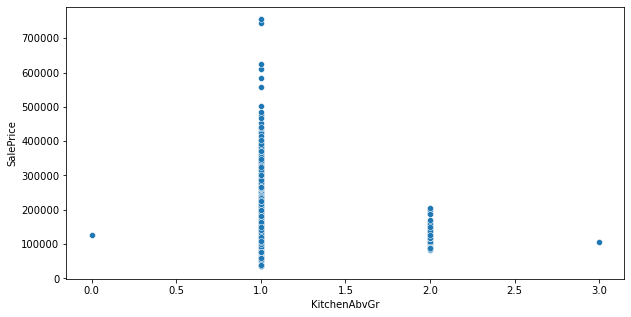

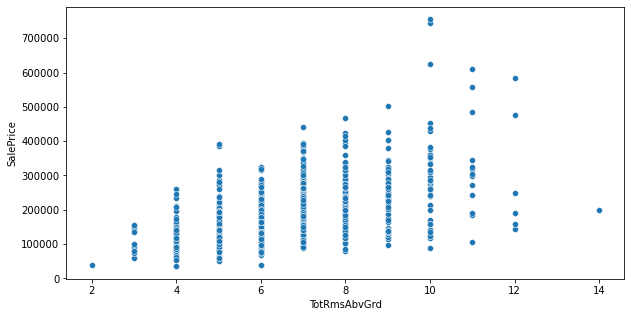

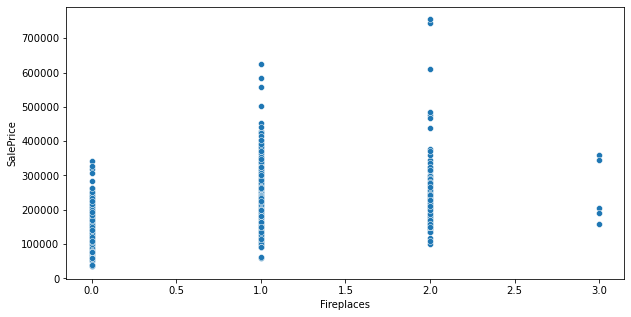

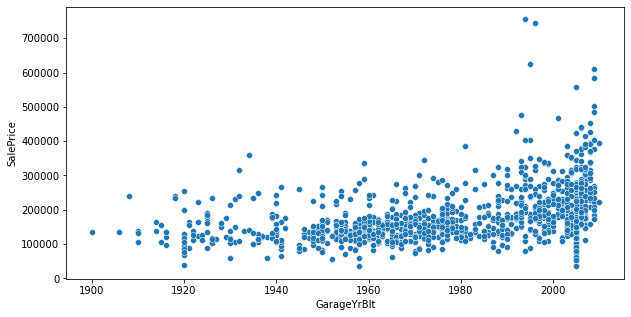

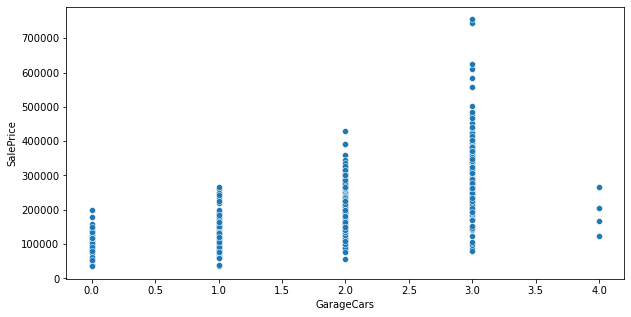

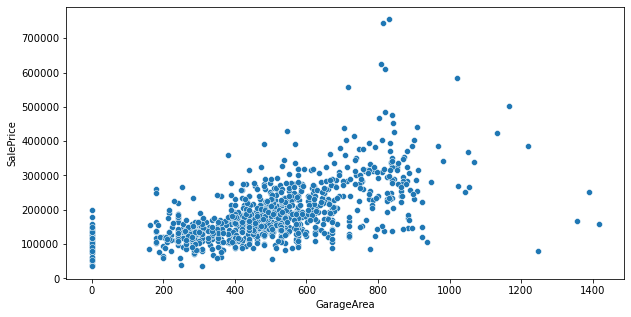

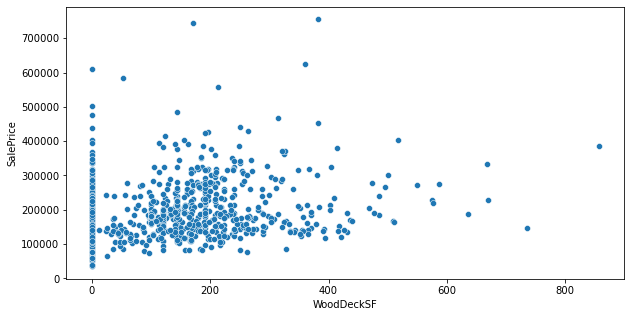

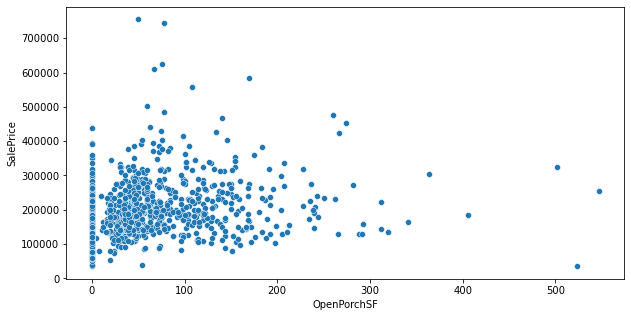

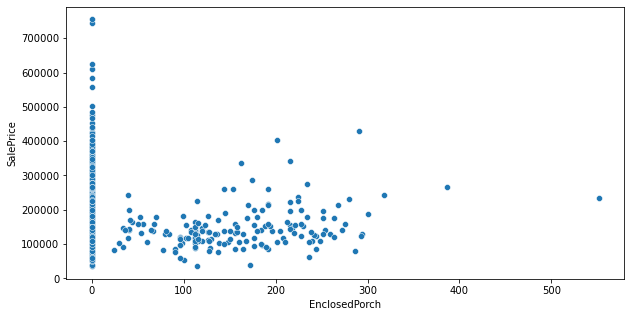

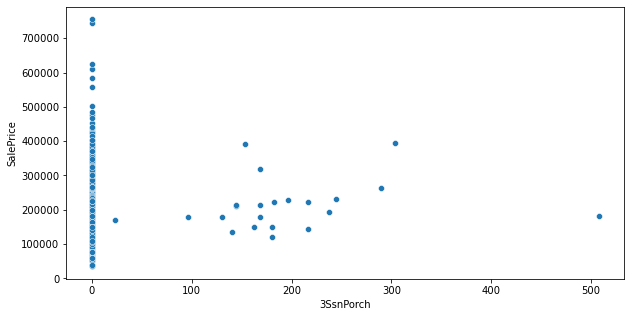

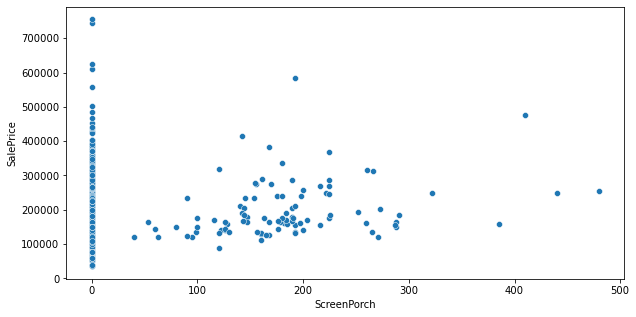

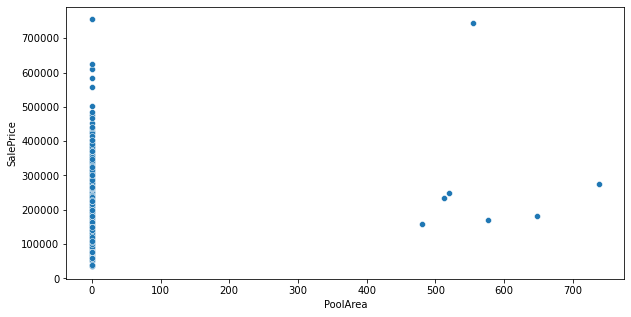

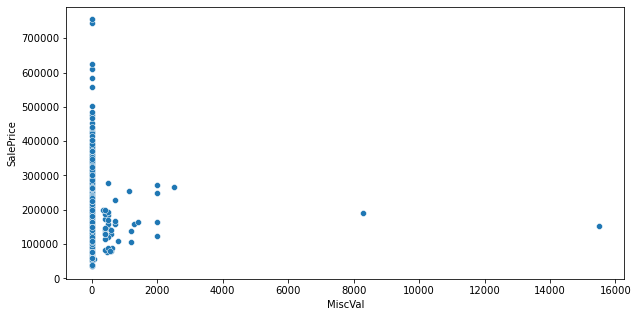

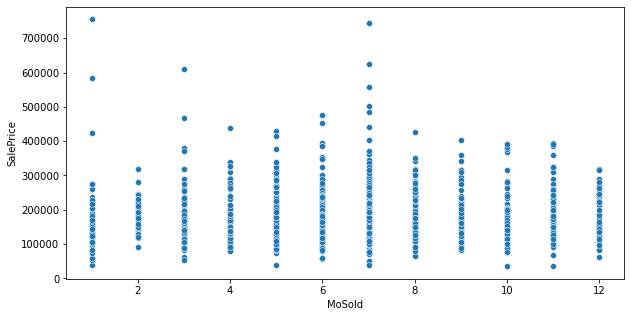

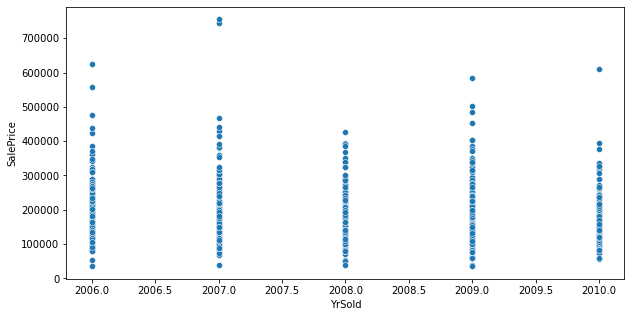

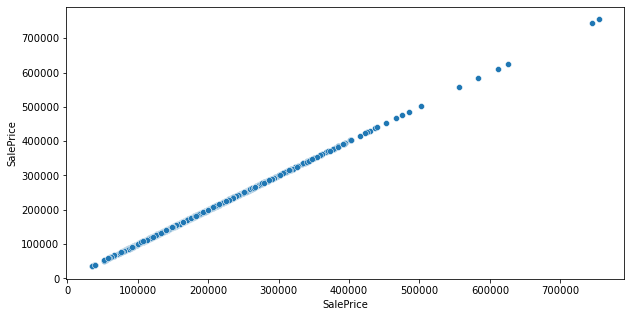

In [312]:
#measuring sales relation with all other columns:
for col in df_train.columns:
    if df_train[col].dtype != 'object':
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=col,y='SalePrice',data=df_train)

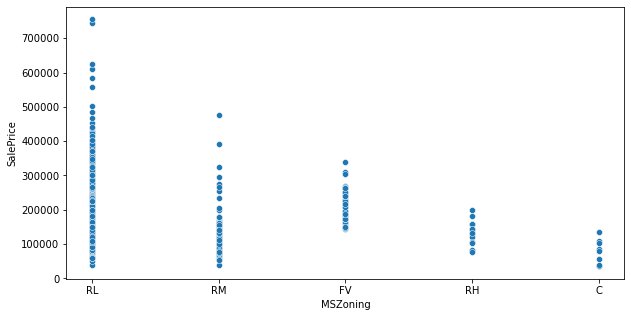

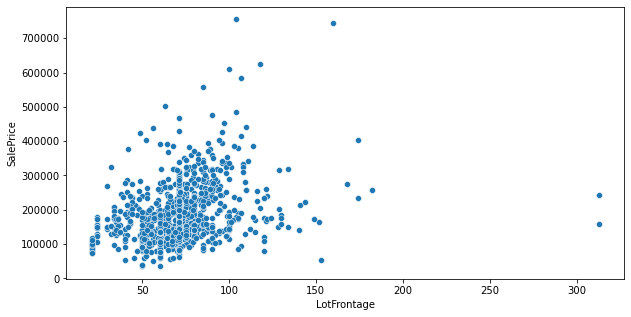

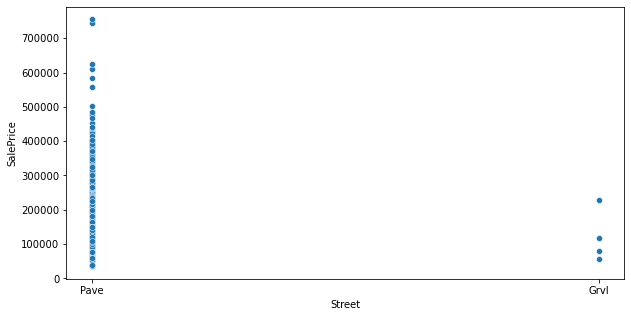

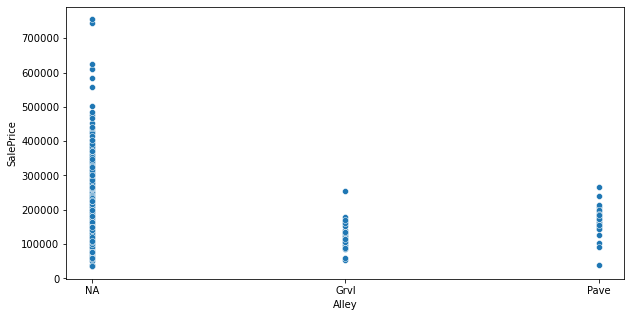

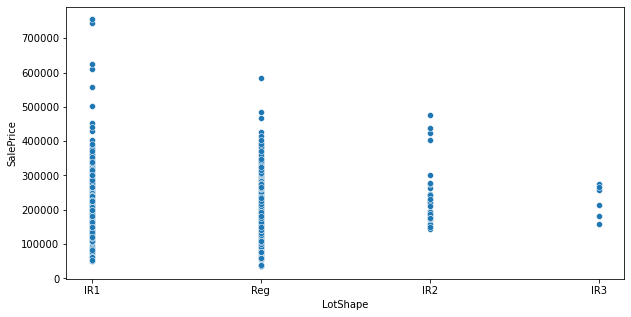

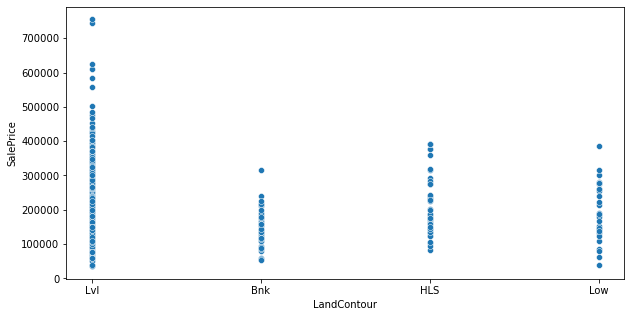

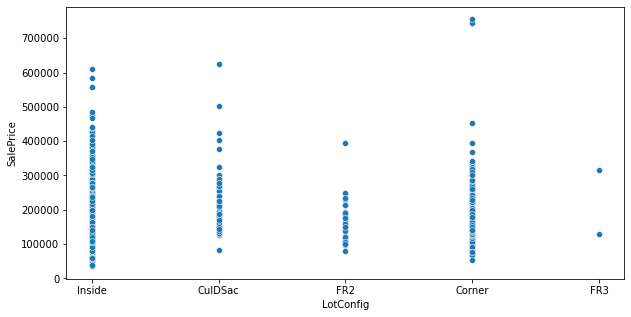

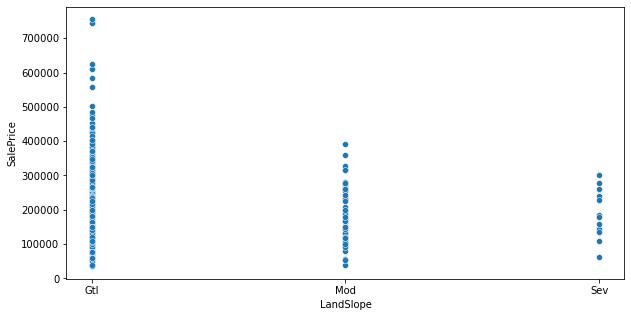

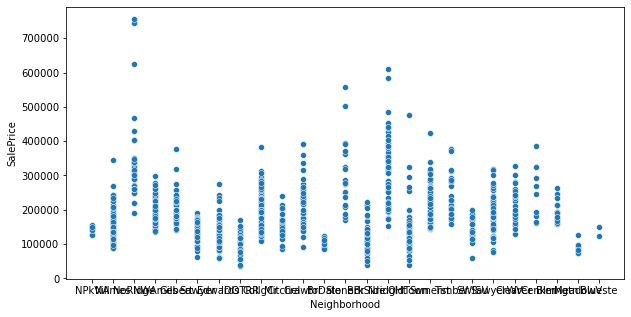

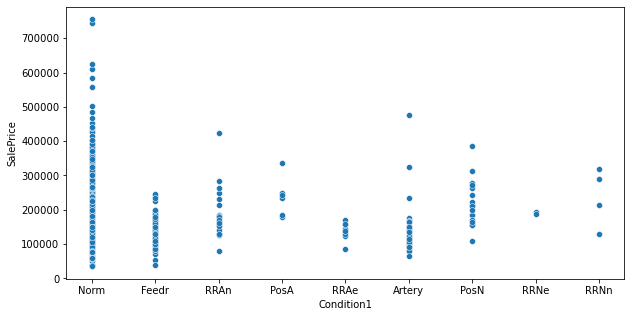

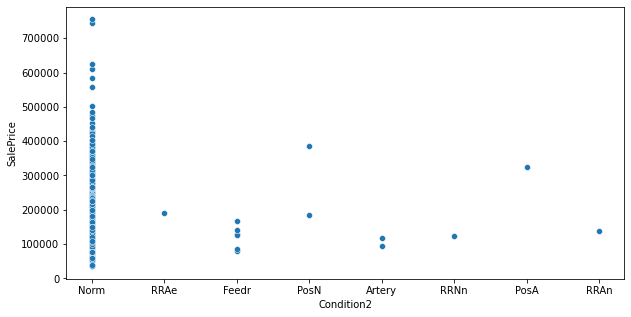

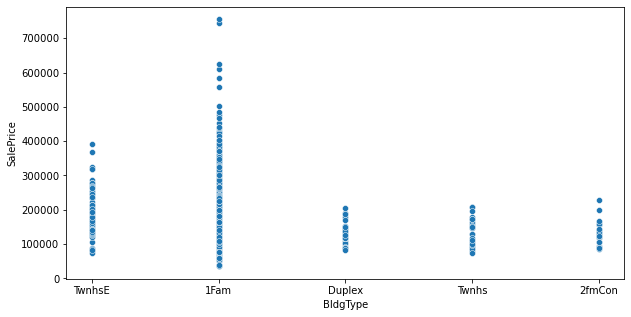

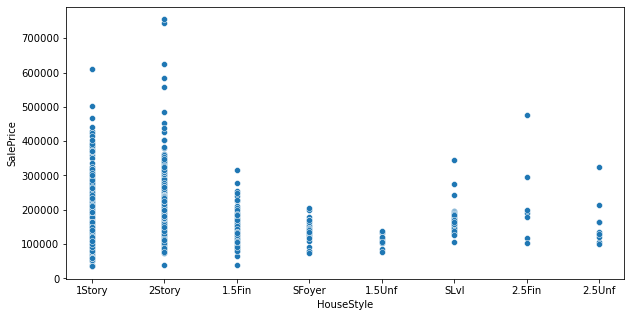

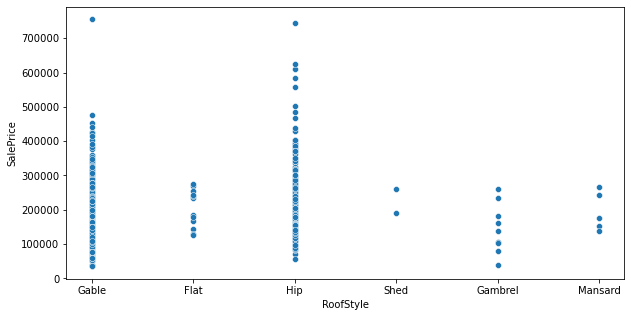

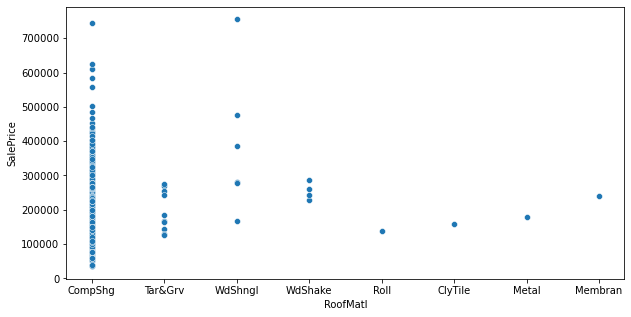

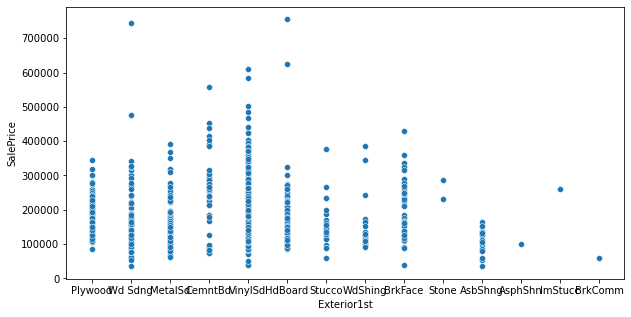

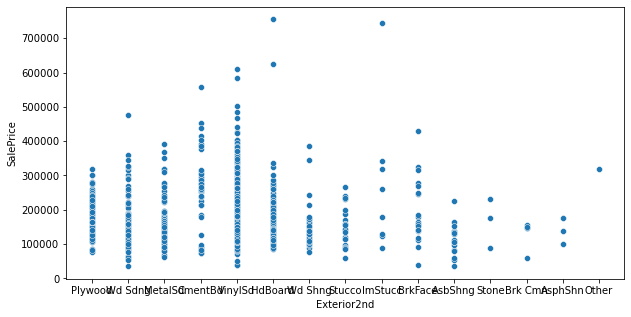

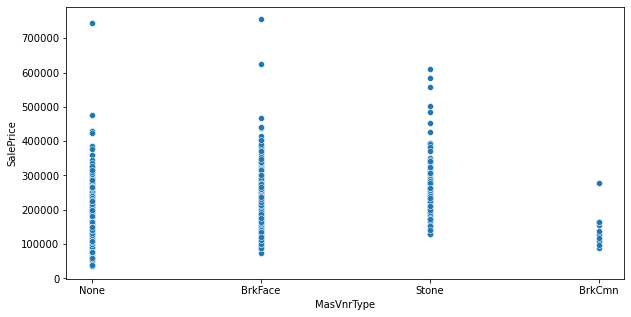

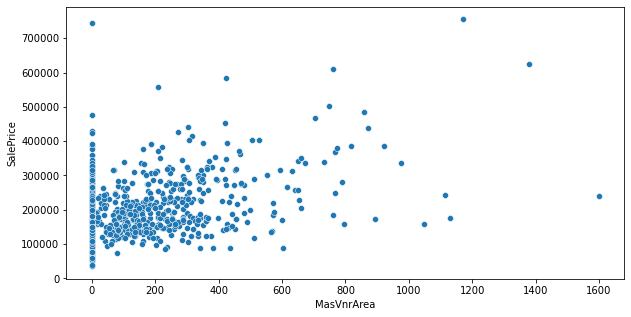

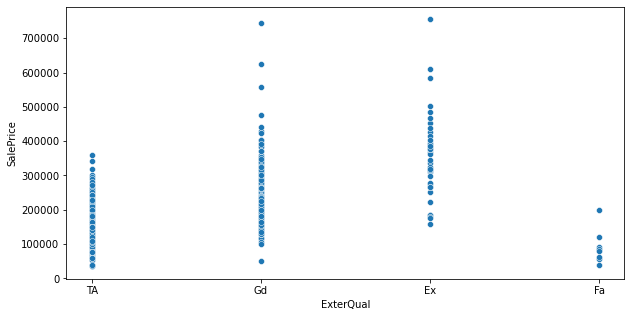

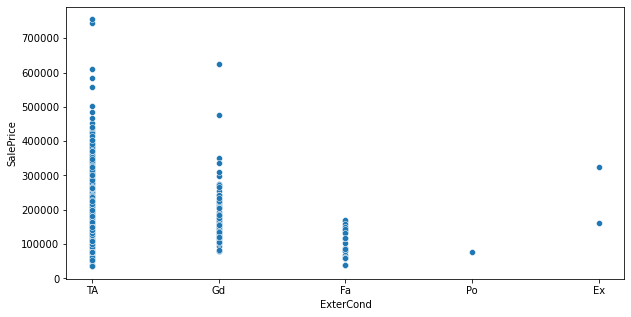

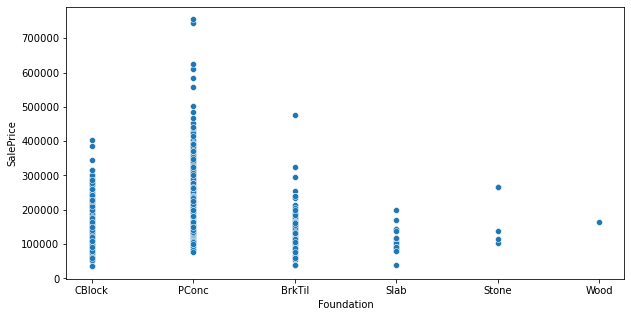

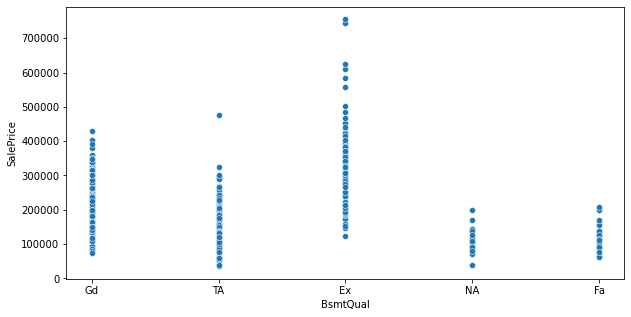

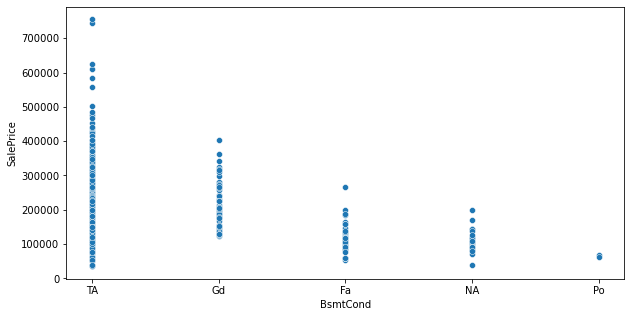

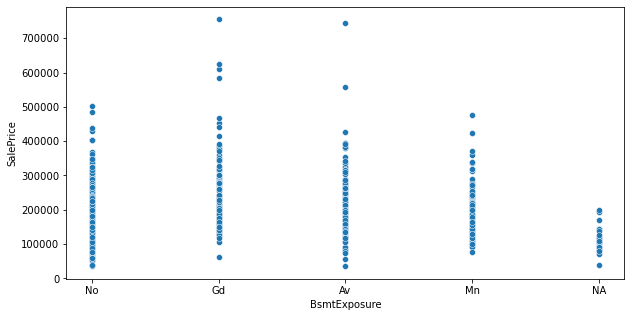

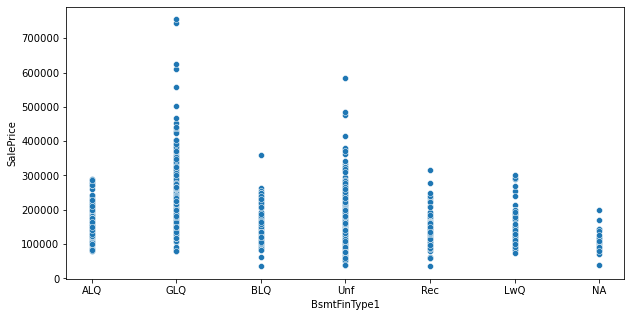

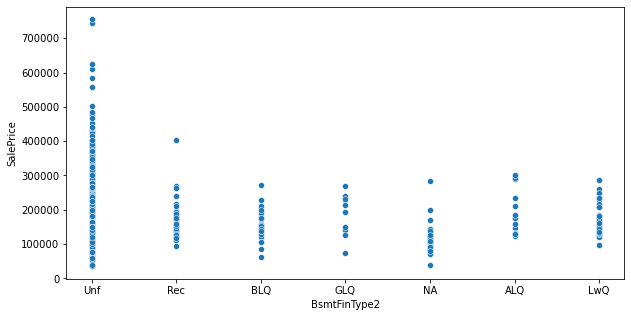

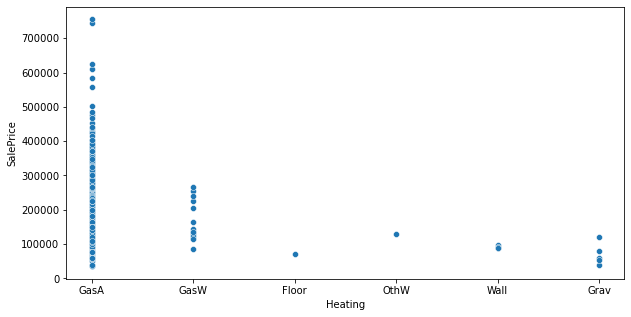

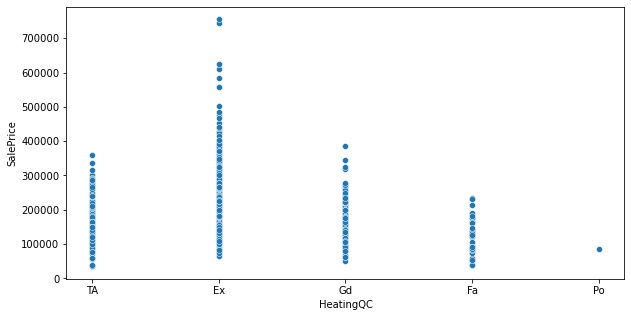

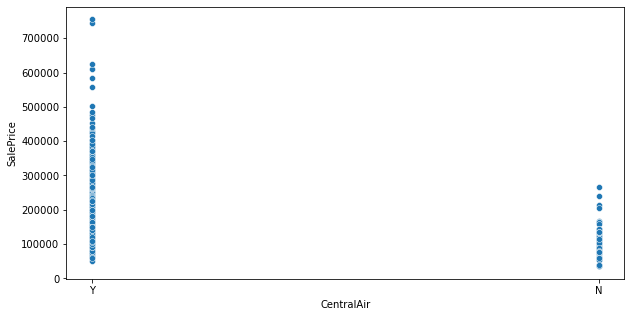

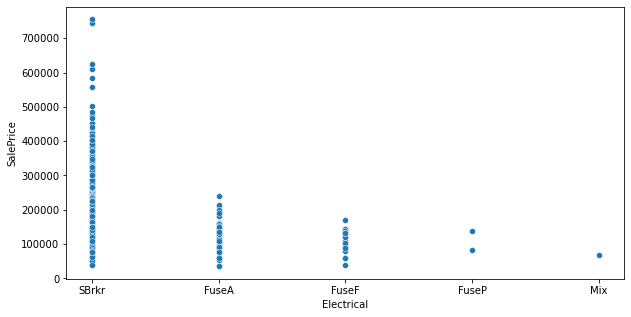

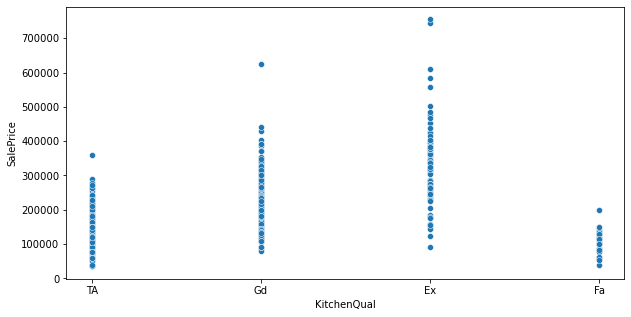

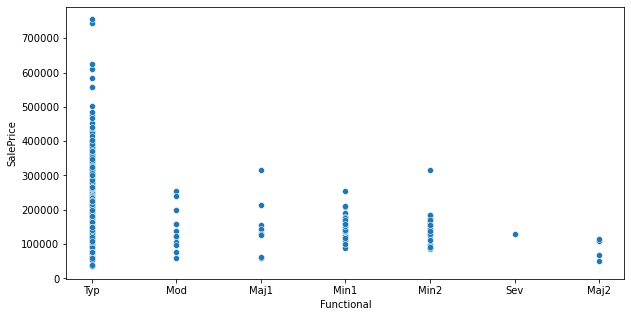

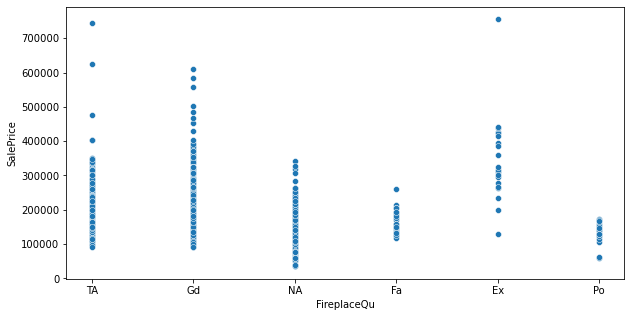

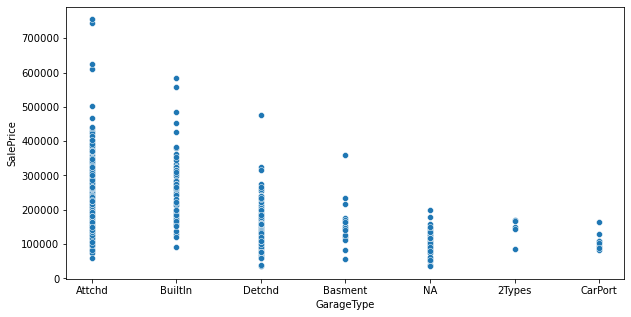

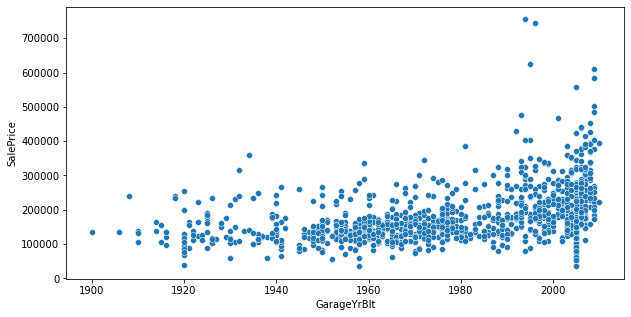

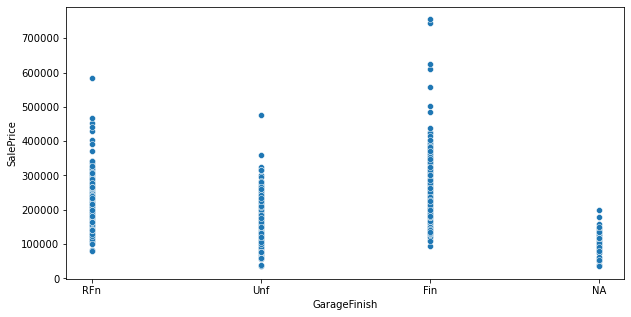

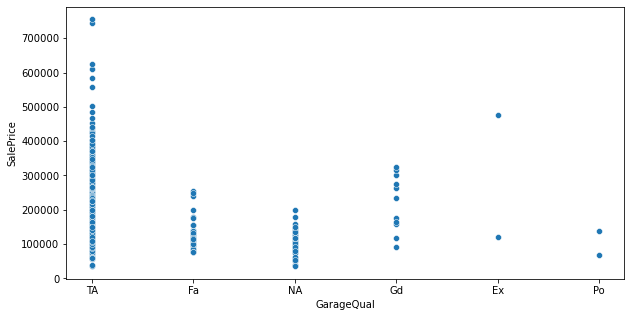

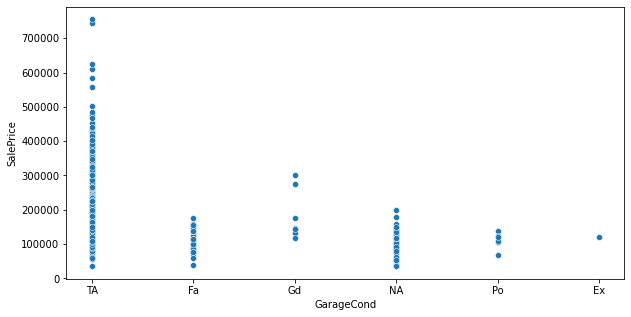

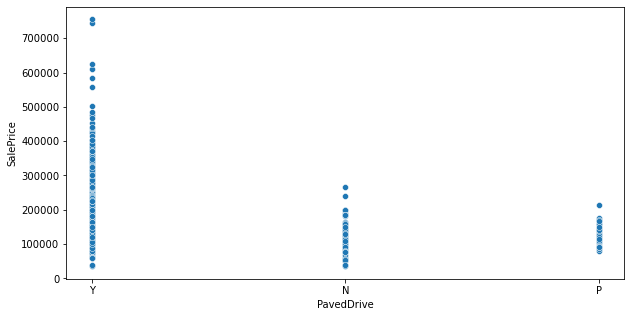

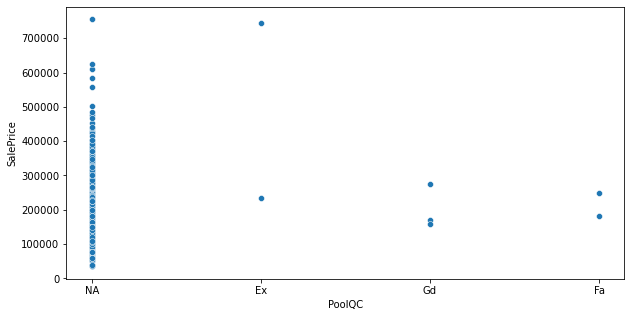

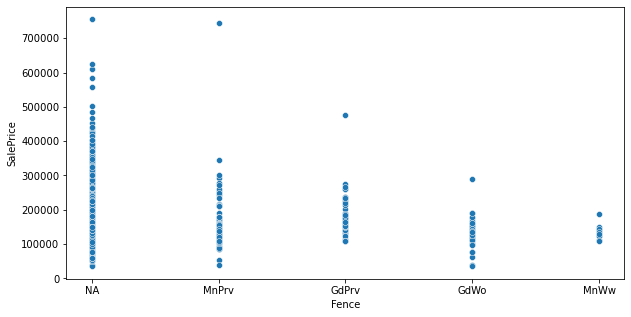

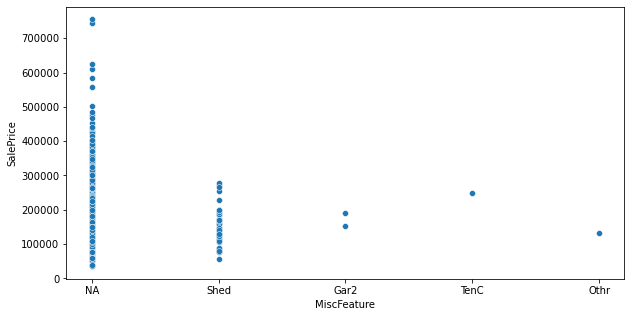

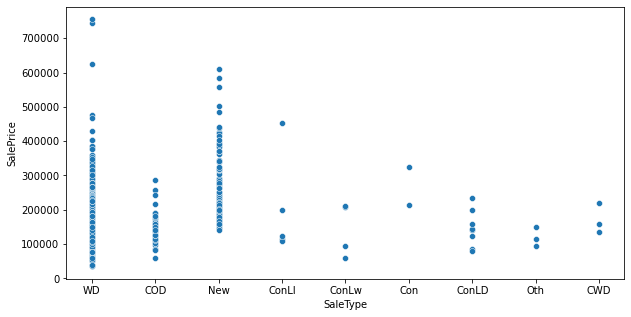

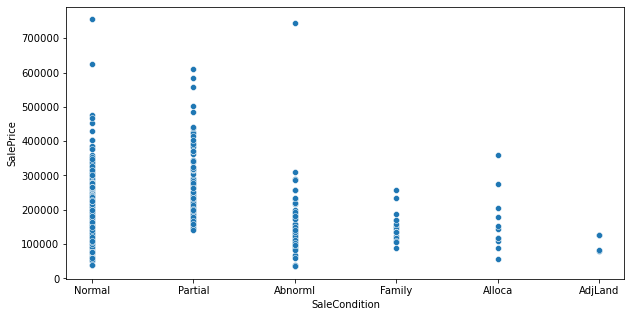

In [313]:
for col in df_train.columns:
    if df_train[col].dtype != 'int64':
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=col,y='SalePrice',data=df_train)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

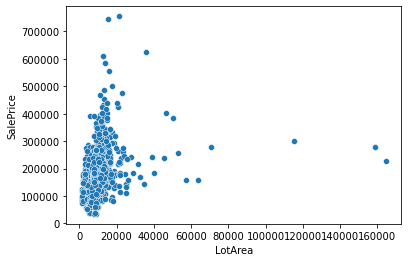

In [304]:
sns.scatterplot(x='LotArea',y='SalePrice',data=df_train)

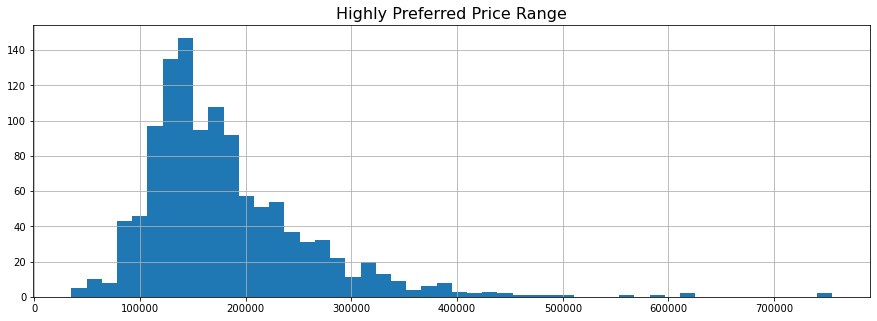

In [346]:
df_train["SalePrice"].hist(bins=50, figsize=(15, 5))
plt.title("Highly Preferred Price Range", fontsize=16);

In [ ]:
df_train.head()

In [431]:
#label ensoding
from sklearn.preprocessing import LabelEncoder
for col in df_train.columns:
    if df_train[col].dtypes == 'object':
        encoder = LabelEncoder()
        df_train[col] = encoder.fit_transform(df_train[col])

In [432]:
df_train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0         120         3     70.98847     4928       1      1         0   
1          20         3     95.00000    15865       1      1         0   
2          60         3     92.00000     9920       1      1         0   
3          20         3    105.00000    11751       1      1         0   
4          20         3     70.98847    16635       1      1         0   

   LandContour  LotConfig  LandSlope  ...  PoolArea  PoolQC  Fence  \
0            3          4          0  ...         0       3      4   
1            3          4          1  ...         0       3      4   
2            3          1          0  ...         0       3      4   
3            3          4          0  ...         0       3      2   
4            3          2          0  ...         0       3      4   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            1        0       2    2007         8              4     128000  
1            1        0      10    2007         8              4     268000  
2            1        0       6    2007         8              4     269790  
3            1        0       1    2010         0              4     190000  
4            1        0       6    2009         8              4     215000  

[5 rows x 79 columns]

In [433]:
#label ensoding with test data
from sklearn.preprocessing import LabelEncoder
for col in df_test.columns:
    if df_test[col].dtypes == 'object':
        encoder = LabelEncoder()
        df_test[col] = encoder.fit_transform(df_test[col])

In [434]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 291
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     290 non-null    int64  
 1   MSZoning       290 non-null    int32  
 2   LotFrontage    245 non-null    float64
 3   LotArea        290 non-null    int64  
 4   Street         290 non-null    int32  
 5   Alley          290 non-null    int32  
 6   LotShape       290 non-null    int32  
 7   LandContour    290 non-null    int32  
 8   LotConfig      290 non-null    int32  
 9   LandSlope      290 non-null    int32  
 10  Neighborhood   290 non-null    int32  
 11  Condition1     290 non-null    int32  
 12  Condition2     290 non-null    int32  
 13  BldgType       290 non-null    int32  
 14  HouseStyle     290 non-null    int32  
 15  OverallQual    290 non-null    int64  
 16  OverallCond    290 non-null    int64  
 17  YearBuilt      290 non-null    int64  
 18  YearRemodA

<AxesSubplot:>

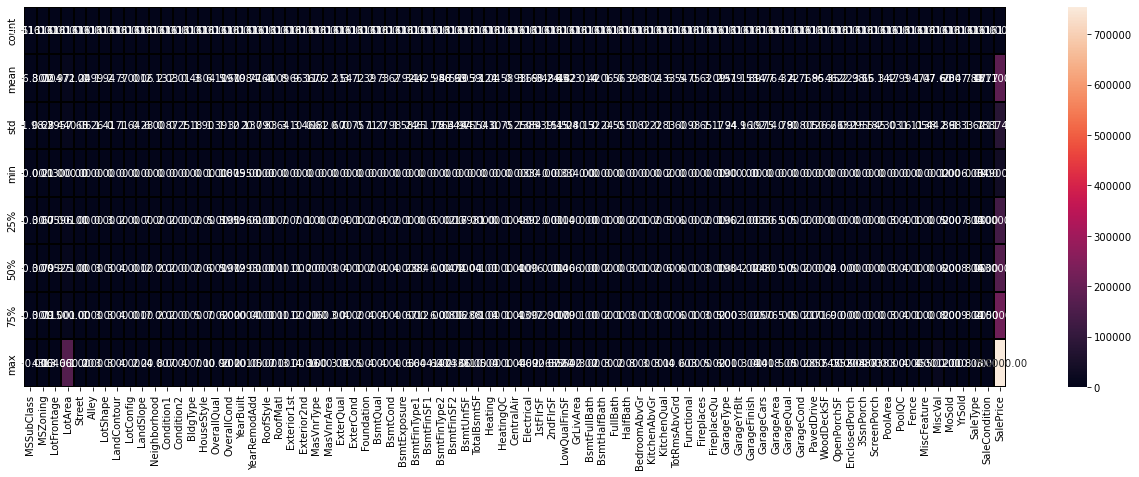

In [364]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df_train.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

<AxesSubplot:>

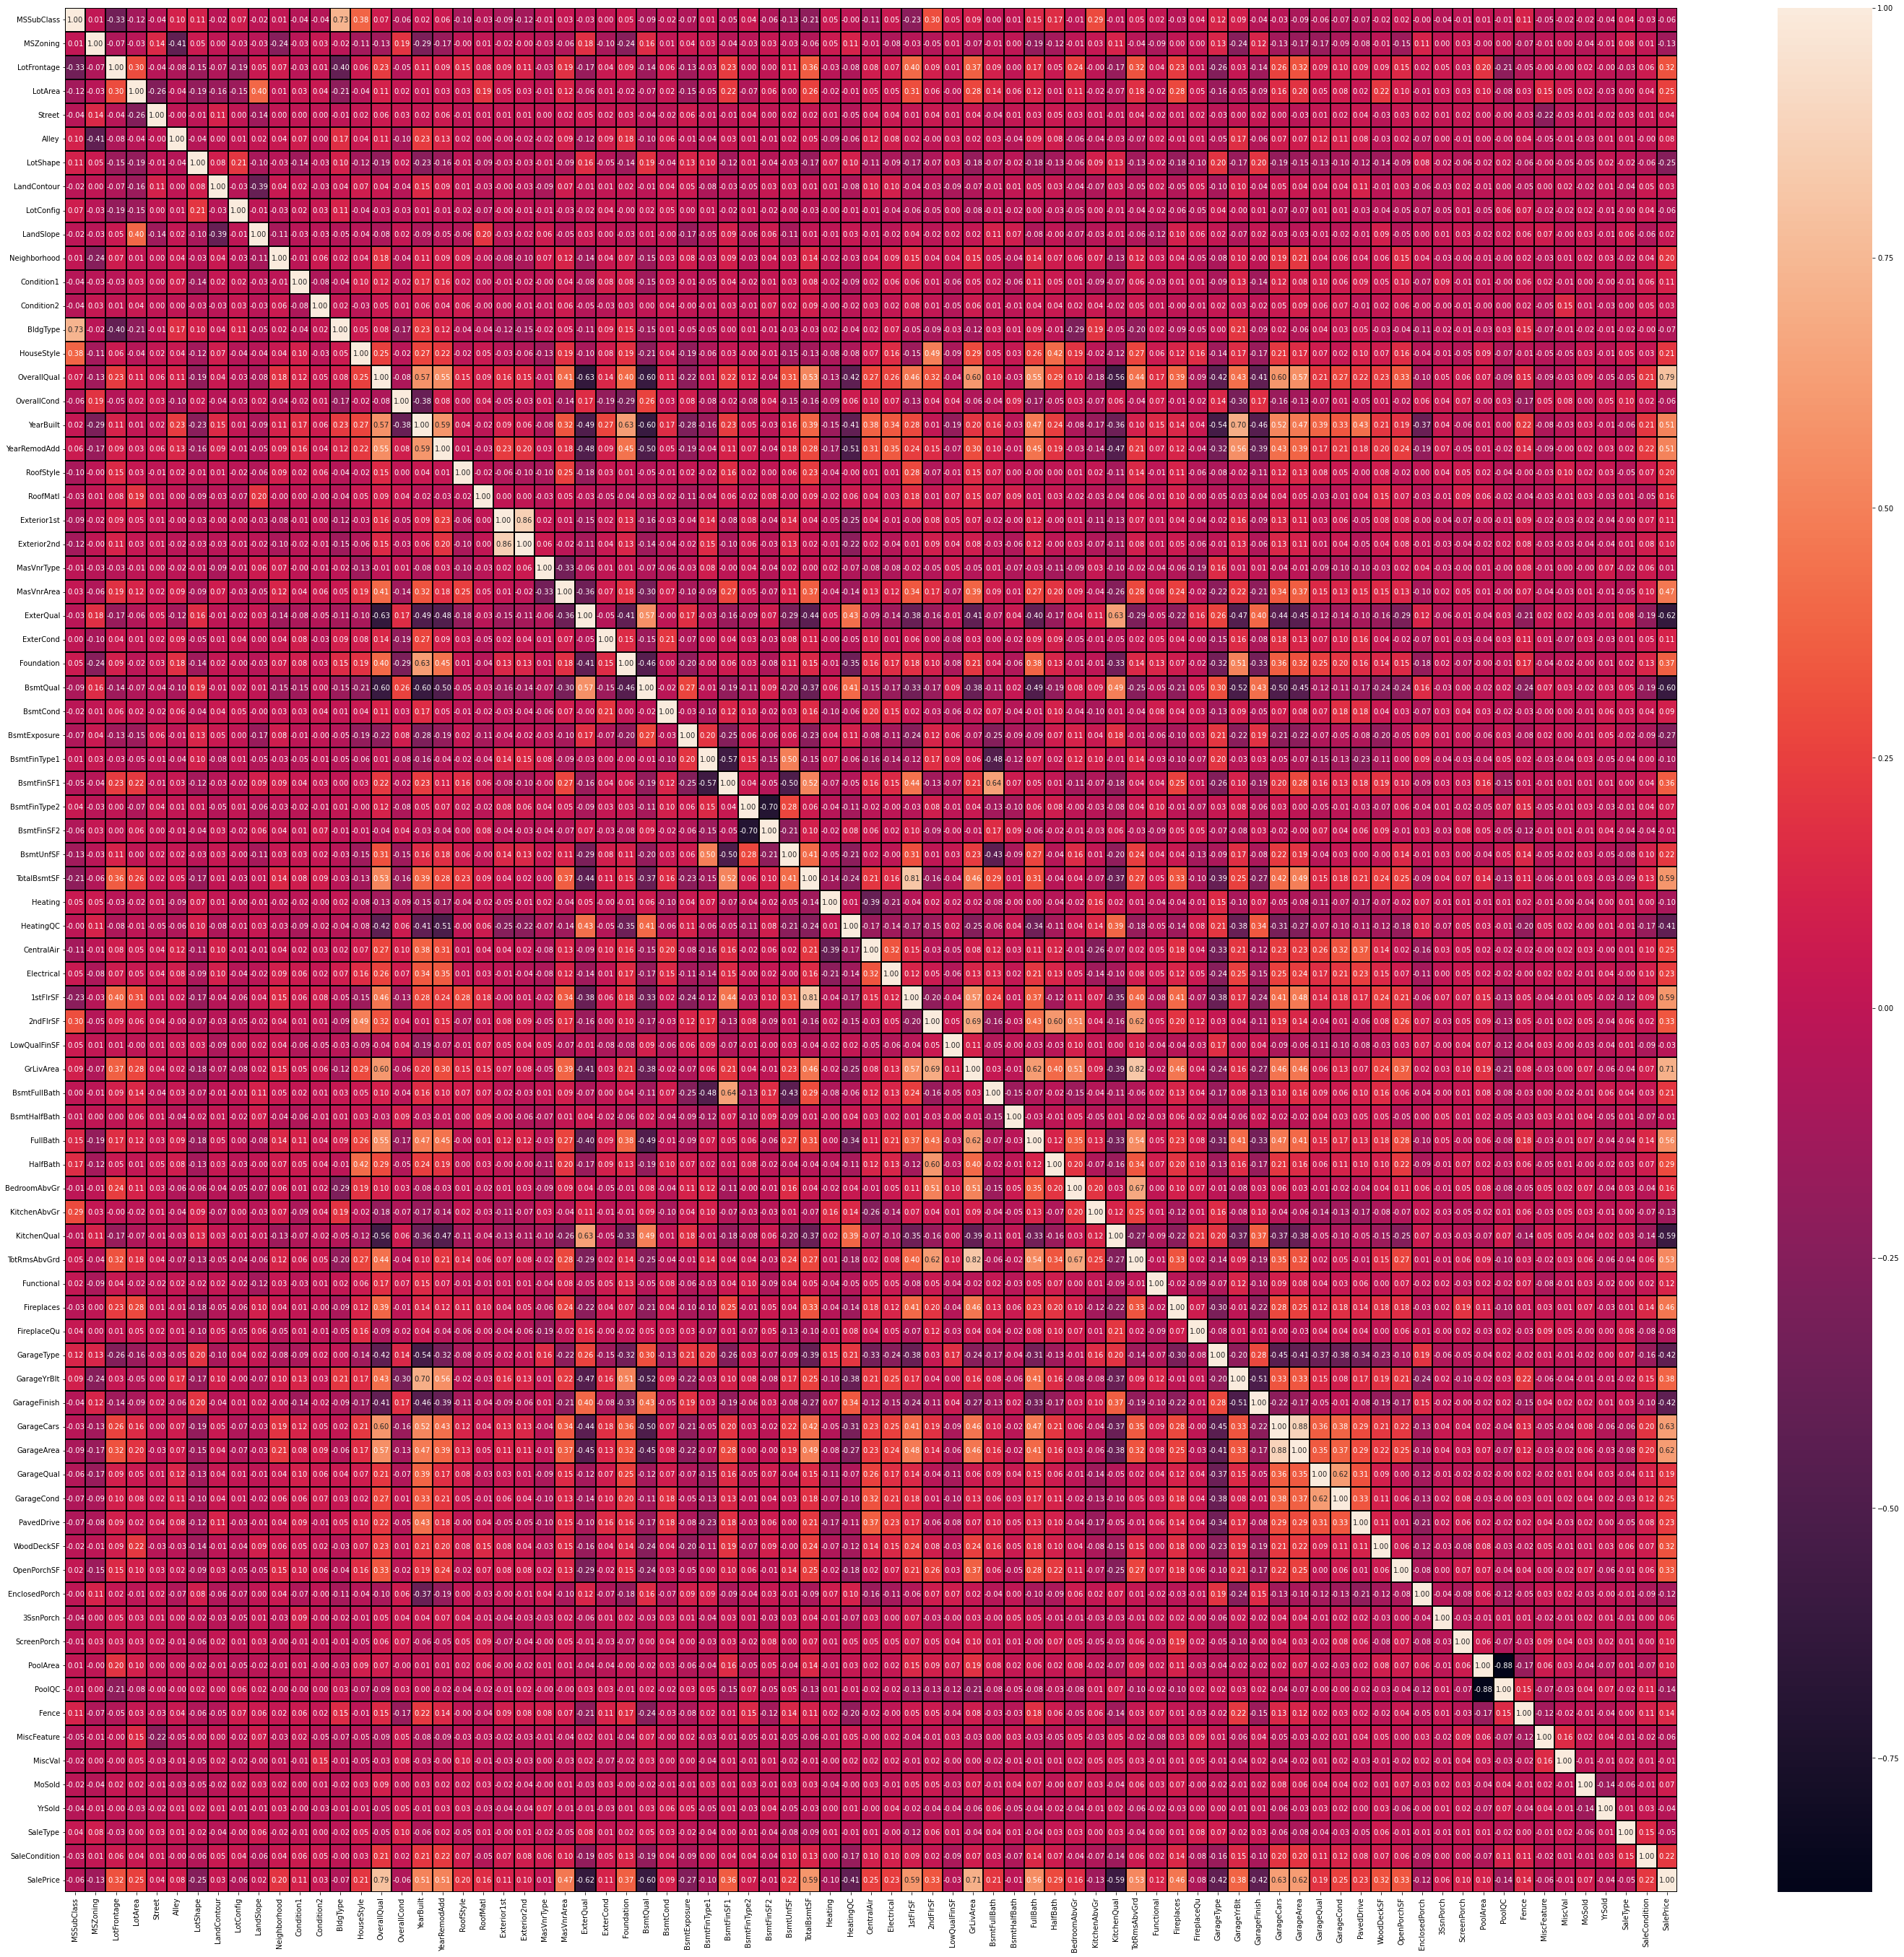

In [365]:
plt.figure(figsize=(50,48))
sns.heatmap(df_train.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [366]:
#there is a ghigh correlation between the following features as per correlation matrix:
BldgType  and MSSubClass
overallQual n SalePrice
SalePrice and GrLivArea
GrLivArea n OverallQual
TotRmsAbvGrd vs GrLivArea
GarageCars vs GarageArea
GrLivArea vs SalePrice
GrLivArea vs totrmsabvgrd
TotalBsmtSF vs 1stFlrSF


SyntaxError: invalid syntax (488767083.py, line 3)

In [ ]:

plt.figure(figsize = (20,10))
plt.title('1stFlrSF vs TotRmsAbvGrd')
plt.scatter(df_train['TotRmsAbvGrd'], df_train['1stFlrSF'])
plt.xticks
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('1stFlrSF')
plt.xticks(rotation = 90)

In [ ]:
#Lets check with scatter plot
plt.scatter(df_train.GrLivArea, df_train.TotRmsAbvGrd)
plt.show()

In [ ]:
#Lets check with scatter plot
plt.scatter(df_train.GrLivArea, df_train.OverallQual)
plt.show()

In [ ]:
#Lets check with scatter plot
plt.scatter(df_train.GrLivArea, df_train.SalePrice)
plt.show()

In [ ]:
#Lets check with scatter plot
plt.scatter(df_train.OverallQual, df_train.SalePrice)
plt.show()

In [ ]:
plt.scatter(df_train.BldgType, df_train.MSSubClass)
plt.show()

In [ ]:
#RELATION WITH PRIMARY FUEL
corr_matrix=df_train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

In [ ]:
#these have the closest correlation to sales price
#SalePrice       1.000000
#OverallQual     0.787837
#GrLivArea       0.709033
#GarageCars      0.627357
#GarageArea      0.617842

In [ ]:
df_train.info()

In [ ]:
df_train.info()

In [435]:
df_train.skew().sort_values(ascending=False) #ti check skewness
#Following is the higly skewed data: MiscVal, PoolArea, Condition2, LotArea     
#Heating, GarageCond, SaleType, Functional, PoolQC and Street     

MiscVal       23.065943
PoolArea      13.243711
Condition2    11.514458
LotArea       10.659285
Heating       10.103609
                ...    
GarageCond    -3.573044
SaleType      -3.660513
Functional    -3.999663
PoolQC       -15.903184
Street       -17.021969
Length: 79, dtype: float64

In [ ]:
#selecting tp 80% features
from sklearn. feature_selection import SelectPercentile
from sklearn. feature_selection import chi2

In [367]:
X = df_train.drop(['SalePrice'], axis=1)
y=df_train.SalePrice


In [368]:
SPercentile=SelectPercentile(score_func=chi2, percentile=80) #we can select 80, 75 or even 85 dpendign on the graph we drew above. 100 percent is accurate but we dont want 100% features to be selected even though it increases accuracy 
SPercentile=SPercentile.fit(X, y)

In [369]:
#Seperate the features to check p-values
cols = SPercentile.get_support(indices=True) # to return index numbers instead of boolean, we mention indices
print ('Feature Index = ',cols)
features=X.columns[cols]
print ('Features=',list(features))

Feature Index =  [ 0  2  3  6  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24 25 27 28 29
 30 31 32 33 34 35 36 38 40 41 42 43 44 45 46 47 48 49 51 52 54 55 56 57
 58 59 60 64 65 66 67 68 69 71 73 74 76 77]
Features= ['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Screen

In [370]:
#Let's print the top 80% features acc to value of importance
train_data_scores = pd.DataFrame({'features': X.columns, 'Chi2Score': SPercentile.scores_, 'pValue': SPercentile.pvalues_})
train_data_scores.sort_values(by='Chi2Score', ascending=False)

features     Chi2Score  pValue
3        LotArea  5.702214e+06     0.0
73       MiscVal  5.635416e+06     0.0
42      2ndFlrSF  3.807582e+05     0.0
34    BsmtFinSF2  3.384094e+05     0.0
32    BsmtFinSF1  3.310248e+05     0.0
..           ...           ...     ...
50  KitchenAbvGr  2.354649e+01     1.0
12    Condition2  1.586361e+01     1.0
70        PoolQC  4.376689e+00     1.0
4         Street  2.578436e+00     1.0
75        YrSold  5.166048e-01     1.0

[78 rows x 3 columns]

In [371]:
features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscVal', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [372]:
# Create subset of selected features
#now u will print the top 80%
X=df_train[features]
y=df_train.SalePrice

In [373]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaler = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=19)

In [374]:
X_scaler

array([[ 1.50597762e+00, -6.33474047e-16, -6.19205336e-01, ...,
        -1.62018065e+00,  3.28251112e-01,  2.09901131e-01],
       [-8.76904857e-01,  1.07139264e+00,  6.02288258e-01, ...,
         1.36558084e+00,  3.28251112e-01,  2.09901131e-01],
       [ 7.62481345e-02,  9.37662325e-01, -6.16762129e-02, ...,
        -1.27299909e-01,  3.28251112e-01,  2.09901131e-01],
       ...,
       [ 2.45913061e+00, -2.09355825e+00, -9.14945945e-01, ...,
         2.45920278e-01,  3.28251112e-01,  2.09901131e-01],
       [ 3.14536382e-01, -9.34562149e-01, -2.20268231e-01, ...,
         2.45920278e-01,  3.28251112e-01,  2.09901131e-01],
       [ 7.62481345e-02, -6.33474047e-16, -2.91634639e-01, ...,
        -1.27299909e-01,  3.28251112e-01,  2.09901131e-01]])

In [375]:
#using linear regression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr=LinearRegression()

In [80]:
from sklearn.metrics import r2_score
for i in range(0,300):
    X_train, X_test, y_train, y_test=train_test_split(X_scaler,y,test_size=0.3,random_state=i)
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.8322219391223148
At random state 0,the testing accuracy is:- 0.8075341439555164


At random state 1,the training accuracy is:- 0.8265397048630976
At random state 1,the testing accuracy is:- 0.8108603126500882


At random state 2,the training accuracy is:- 0.8238897247329591
At random state 2,the testing accuracy is:- 0.8280244829249223


At random state 3,the training accuracy is:- 0.8119338633040009
At random state 3,the testing accuracy is:- 0.8497204819033529


At random state 4,the training accuracy is:- 0.824609750267242
At random state 4,the testing accuracy is:- 0.7805618953198392


At random state 5,the training accuracy is:- 0.8570925032021335
At random state 5,the testing accuracy is:- 0.7282318211153258


At random state 6,the training accuracy is:- 0.8242603073861845
At random state 6,the testing accuracy is:- 0.8165424877902742


At random state 7,the training accuracy is:- 0.8646029185761147
At random state 7,the testing accu

At random state 68,the training accuracy is:- 0.8330088973212703
At random state 68,the testing accuracy is:- 0.7866624041383461


At random state 69,the training accuracy is:- 0.85895448192157
At random state 69,the testing accuracy is:- 0.5790684186756776


At random state 70,the training accuracy is:- 0.8357776544193245
At random state 70,the testing accuracy is:- 0.7960761998146441


At random state 71,the training accuracy is:- 0.8286796859431764
At random state 71,the testing accuracy is:- 0.8129849049433387


At random state 72,the training accuracy is:- 0.8205778848085532
At random state 72,the testing accuracy is:- 0.8205062699349599


At random state 73,the training accuracy is:- 0.8220337586874946
At random state 73,the testing accuracy is:- 0.8187868615473364


At random state 74,the training accuracy is:- 0.8134092646308007
At random state 74,the testing accuracy is:- 0.853216433152941


At random state 75,the training accuracy is:- 0.8083526429639982
At random state 75,th

At random state 138,the training accuracy is:- 0.8511283107835569
At random state 138,the testing accuracy is:- 0.7521211315157413


At random state 139,the training accuracy is:- 0.8352076381867166
At random state 139,the testing accuracy is:- 0.7915058030524277


At random state 140,the training accuracy is:- 0.8976032080578309
At random state 140,the testing accuracy is:- 0.5610283904277336


At random state 141,the training accuracy is:- 0.8223381035652398
At random state 141,the testing accuracy is:- 0.8254855127496147


At random state 142,the training accuracy is:- 0.8955426916774027
At random state 142,the testing accuracy is:- 0.4746779939484803


At random state 143,the training accuracy is:- 0.8362982016037497
At random state 143,the testing accuracy is:- 0.7900975793554958


At random state 144,the training accuracy is:- 0.8602268166842018
At random state 144,the testing accuracy is:- 0.7223835423901316


At random state 145,the training accuracy is:- 0.86421470975224
At ra

At random state 207,the training accuracy is:- 0.8129783670765351
At random state 207,the testing accuracy is:- 0.8642966349261239


At random state 208,the training accuracy is:- 0.8204137102712922
At random state 208,the testing accuracy is:- 0.830332927228884


At random state 209,the training accuracy is:- 0.8193885967043599
At random state 209,the testing accuracy is:- 0.8377765331263765


At random state 210,the training accuracy is:- 0.8641597431863686
At random state 210,the testing accuracy is:- 0.6320869395658366


At random state 211,the training accuracy is:- 0.9034406859762386
At random state 211,the testing accuracy is:- 0.3537597866309564


At random state 212,the training accuracy is:- 0.8208176259920781
At random state 212,the testing accuracy is:- 0.838340201790117


At random state 213,the training accuracy is:- 0.8957721451771389
At random state 213,the testing accuracy is:- 0.4304340087137729


At random state 214,the training accuracy is:- 0.8527633344234831
At ra

At random state 270,the training accuracy is:- 0.8375165812642179
At random state 270,the testing accuracy is:- 0.7884218086841908


At random state 271,the training accuracy is:- 0.8201586674002395
At random state 271,the testing accuracy is:- 0.8354028669966982


At random state 272,the training accuracy is:- 0.8153550843950597
At random state 272,the testing accuracy is:- 0.8420427160470709


At random state 273,the training accuracy is:- 0.8629168664942486
At random state 273,the testing accuracy is:- 0.653936955850678


At random state 274,the training accuracy is:- 0.8742318132151489
At random state 274,the testing accuracy is:- 0.635238131651881


At random state 275,the training accuracy is:- 0.8982628695310257
At random state 275,the testing accuracy is:- 0.5812352736852593


At random state 276,the training accuracy is:- 0.8378439529262263
At random state 276,the testing accuracy is:- 0.7917203027380244


At random state 277,the training accuracy is:- 0.8149308421068605
At ra

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=19)

In [377]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [380]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 20162.357030819938
MSE: 718299684.2051339
RMSE: 26801.11348815817


In [381]:
lr.score(X_train , y_train)

0.8120694118762383

In [382]:
#With descision tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
predD=dt.predict(X_test)

In [383]:
print('MAE:', metrics.mean_absolute_error(y_test, predD))
print('MSE:', metrics.mean_squared_error(y_test, predD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predD)))

MAE: 27801.793696275072
MSE: 1881766883.765043
RMSE: 43379.33705999947


In [384]:
dt.score(X_train , y_train)

1.0

In [385]:
#With random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
predR=rfr.predict(X_test)

In [386]:
print('MAE:', metrics.mean_absolute_error(y_test, predR))
print('MSE:', metrics.mean_squared_error(y_test, predR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predR)))

MAE: 17004.494670487104
MSE: 660090336.8307335
RMSE: 25692.223275355784


In [387]:
rfr.score(X_train , y_train)

0.9768587269134625

In [388]:
#with Adaboost 
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)
predA=ada.predict(X_test)

In [389]:
print('MAE:', metrics.mean_absolute_error(y_test, predA))
print('MSE:', metrics.mean_squared_error(y_test, predA))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predA)))

MAE: 22346.277721159608
MSE: 870510852.7935766
RMSE: 29504.42090252877


In [390]:
ada.score(X_train , y_train)

0.8920795475688192

Y Test       Pred
903  145000  168872.08
281  110500  127834.58
167  178000  178824.04
965  132500  134509.37
329  215200  191934.23

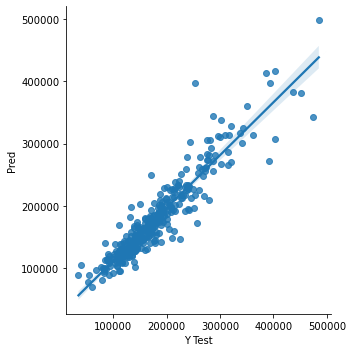

In [391]:
#with random forest
data = pd.DataFrame({'Y Test':y_test , 'Pred':predR},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

Y Test           Pred
903  145000  178530.490196
281  110500  161517.914894
167  178000  208106.657303
965  132500  131280.559322
329  215200  214937.219653

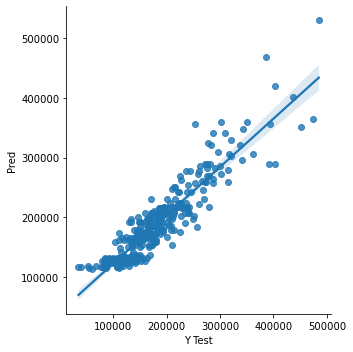

In [392]:
#with adaboost
data = pd.DataFrame({'Y Test':y_test , 'Pred':predA},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [393]:
#thus we can conclude that Random forest is the best method, even better than adaboost.
#Hyper tuning is not required as accuracy is already 97%

In [394]:
Random_Forest_tuning=rfr.fit(X_train,y_train)

In [395]:
import pickle as pkl
Housing_Price_Model = 'Income_Census.pickle'
pkl.dump(Random_Forest_tuning, open(Housing_Price_Model,'wb'))